# Telco Churn Analysis
In this project, I use supervised learning models to identify customers who are likely to stop using service in the future. 

[Part 1: Data Exploration](#Part-1:-Data-Exploration)

[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)

[Part 3: Model Training and Evaluation](#Part-3:-Model-Training-and-Evaluation)

[Part 4: Testing and Evaluation](#Part-4:-Testing-and-Evaluation)

[Part 5: Model Deployment & Inference](#Part-5:-Model-Deployment-&-Inference)

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month
Source: Kaggle

## Part 1: Data Exploration

In [75]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data file **

In [76]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [78]:
df.shape

(7043, 21)

In [79]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [80]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [81]:
# Check the descriptive statistics of numeric variables
# Only 3 colums are shown because the rest numeric columns are object type
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation:

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

There is no duplicated rows

In [82]:
df.duplicated().sum()

0

Observation: Unbalanced data, 'No churn' group as majority and 'Churn' as minority

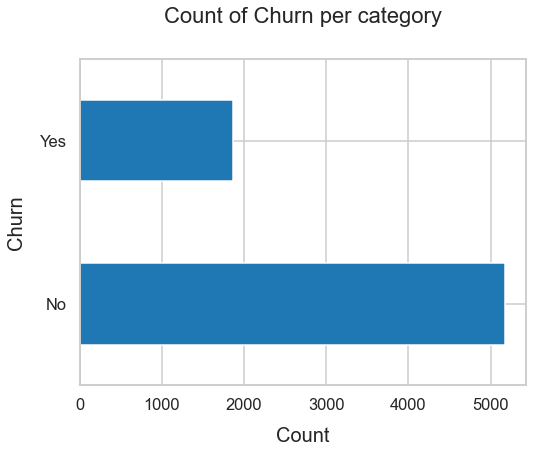

In [83]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Count of Churn per category", y=1.02);

In [84]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [85]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

If using real data with missingness, consider below:

* Imputation: for features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

In [86]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


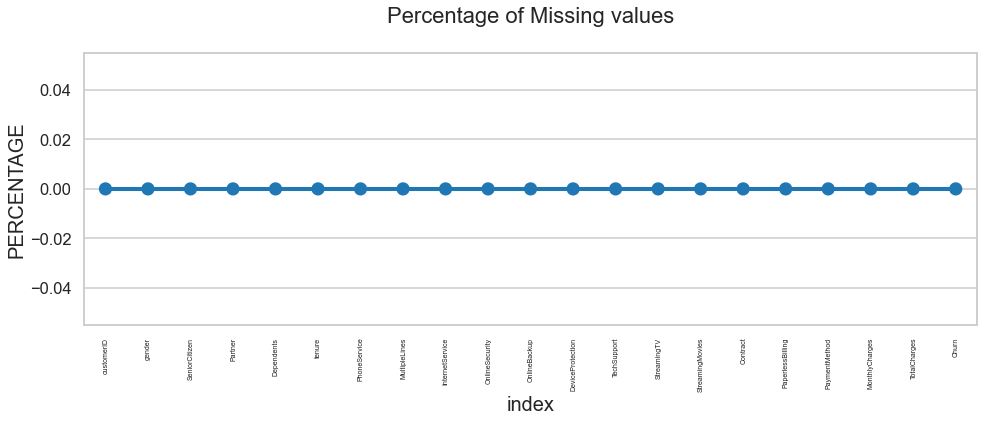

In [87]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x = 'index', y = 0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Data Cleaning


**1.** Total Charges should be numeric amount. Let's convert it to numerical data type. As converting, 11 missing celss are shown.

In [88]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')##errors = 'coerce', invalid parsing will be set as NaN
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**2.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [89]:
df.loc[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**3. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [90]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

**4.** Remove columns not required for processing

In [91]:
#drop column customerID as it is a unique variable and not helpful for training
df.drop(columns= ['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**5.** Tenure is a numeric vlaue with month as unit. In order to allow easier and better analysis, create groups out of tenue. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [92]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

##pd.cut function segment continuous tenure variable into categorical variable
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [93]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

### Univariate Analysis

#### Observation:
1. No noticeble difference in churn rate in differenct gender
2. Senior Citizen has higher percentage of churning
3. People without a partner are more likely to churn
4. People with Fiber optic internet are more likely to churn while people with no internet service have very low churn rate.
5. People with no online support has higher churn rate.
6. People on Month-to-month plan have a much more higher churn rate than people with contract. (Getting more customer on a contract plan will increase retention rate?)
7. People pay with electronic check have a much higher churn rate than other payments. 


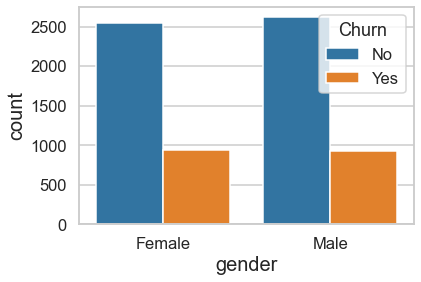

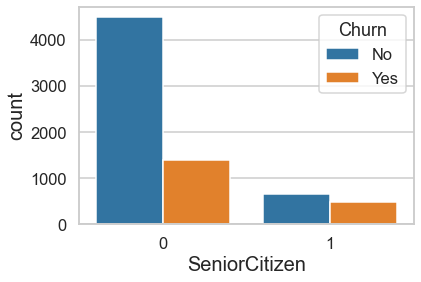

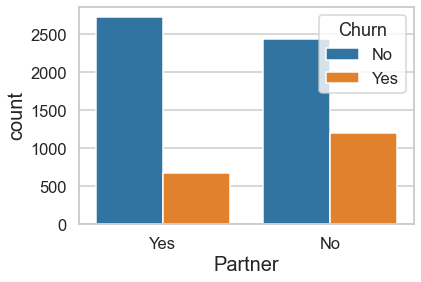

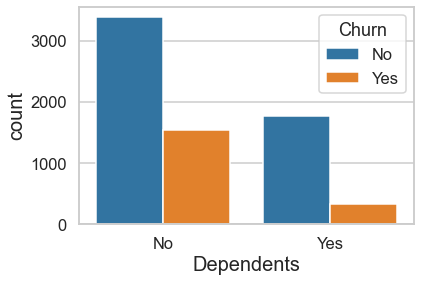

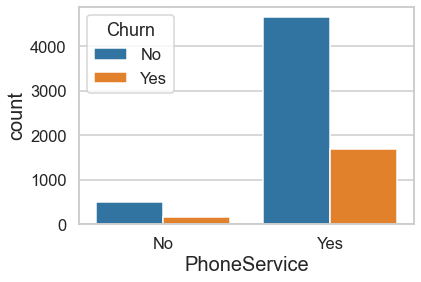

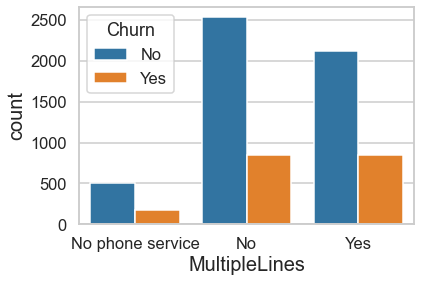

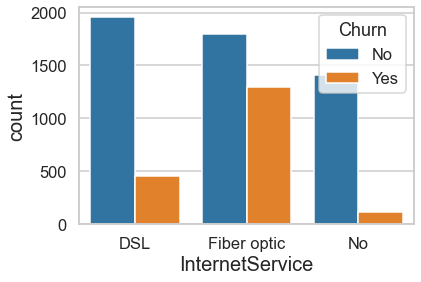

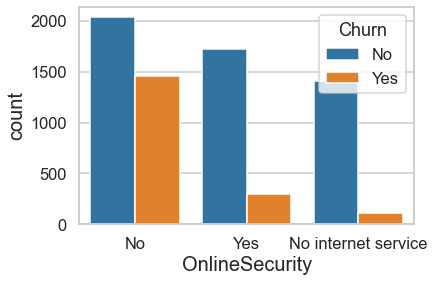

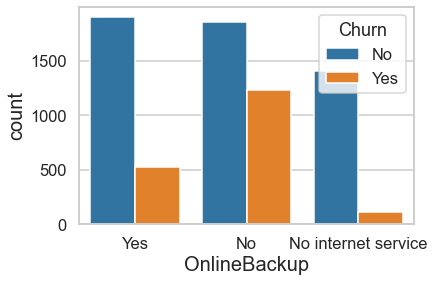

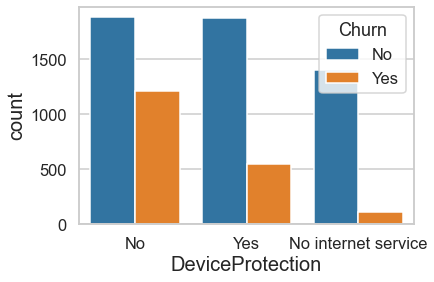

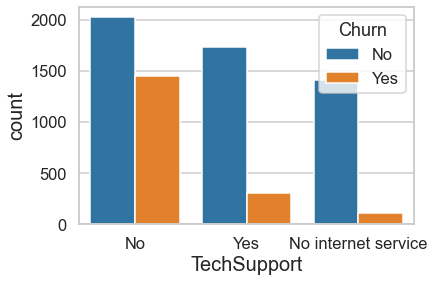

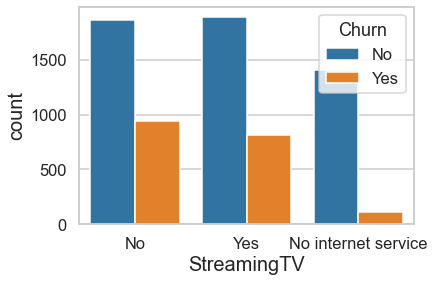

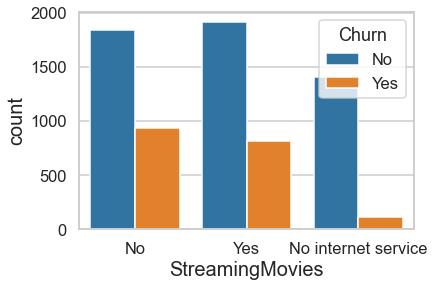

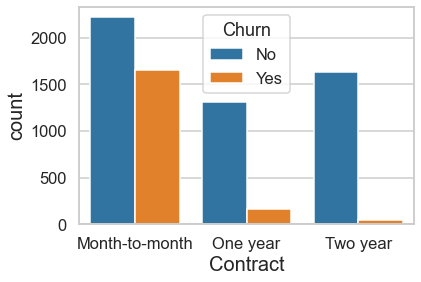

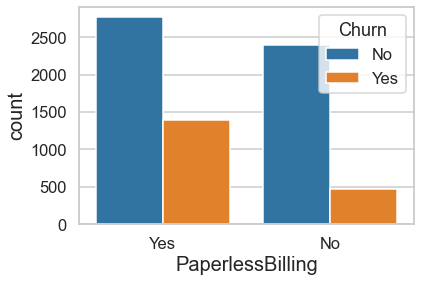

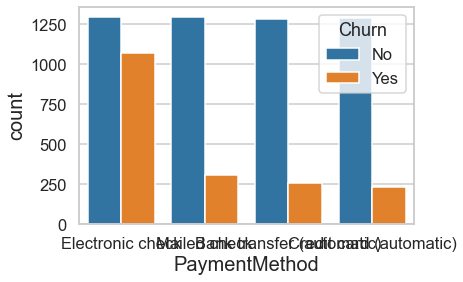

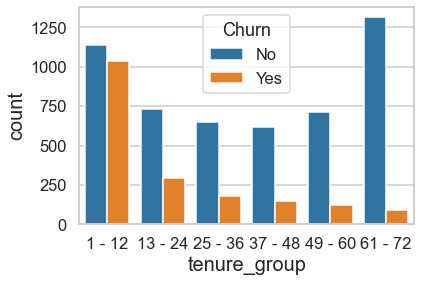

In [94]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'tenure','TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

### Bivariate Analysis

In [95]:
new_df_churn1=df.loc[df["Churn"]=='Yes']
new_df_churn0=df.loc[df["Churn"]=='No']

In [96]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

####Observation:
1. From Univariate analysis we find no big difference in churn between gender, and people without partner have high churn rate. Bivariate analysis shows Female without partner have higher churn rate.
2. In churned snior citizen, no big differnce in churn rate between male and female.
3. 

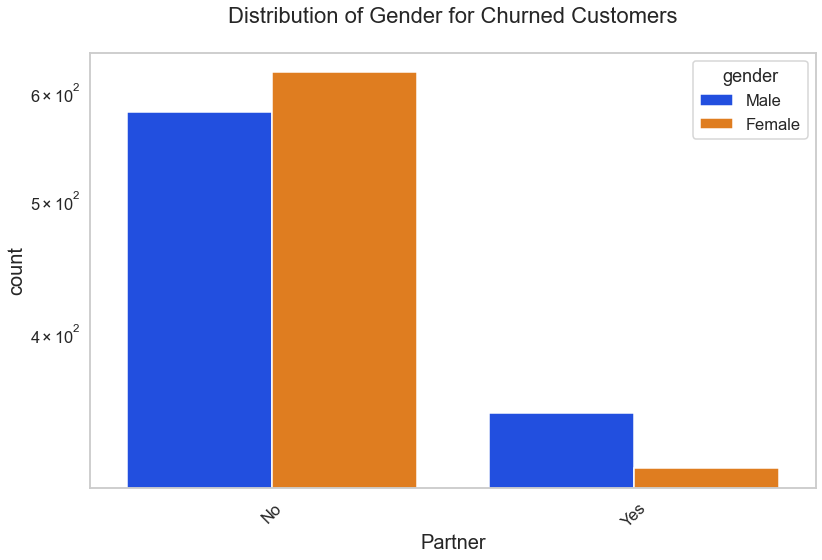

In [97]:
uniplot(new_df_churn1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

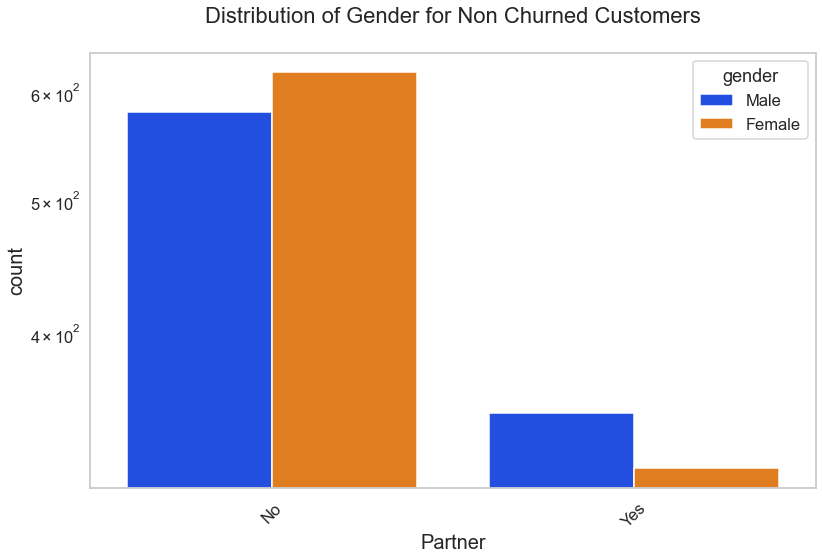

In [98]:
uniplot(new_df_churn1,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

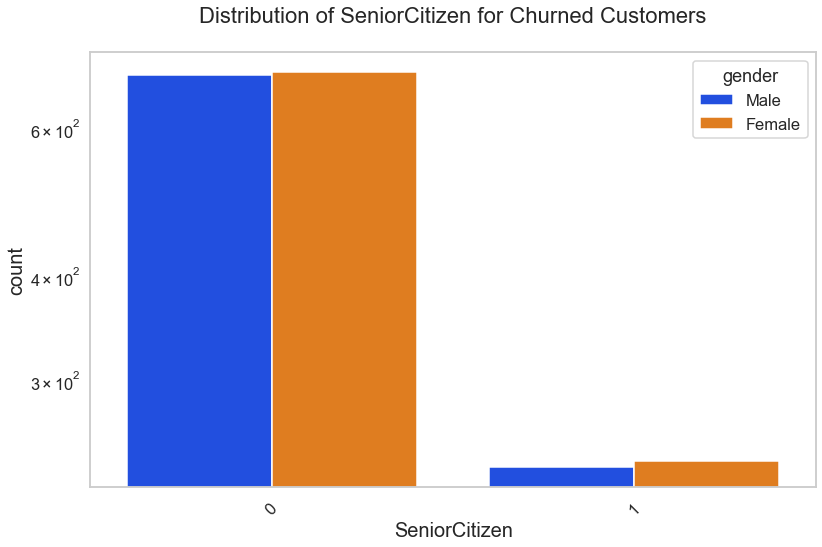

In [99]:
uniplot(new_df_churn1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

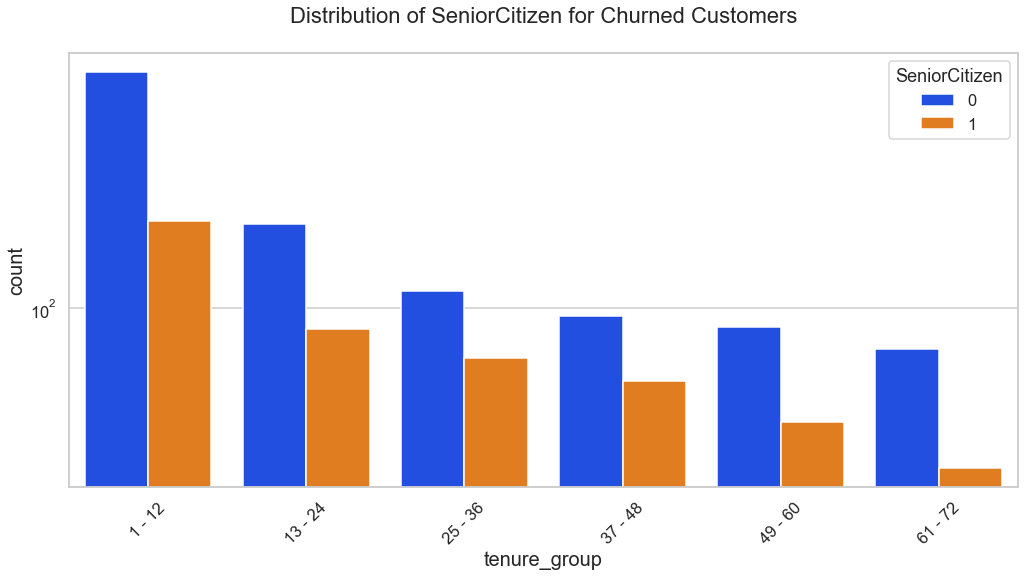

In [100]:
uniplot(new_df_churn1,col='tenure_group',title='Distribution of SeniorCitizen for Churned Customers',hue='SeniorCitizen')

Observation: 
1. Churn is high when Monthly Charges ar high
2. Churn is high when Total Charges is low. This is suprising. But if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

Text(0.5, 1.0, 'Monthly charges by churn')

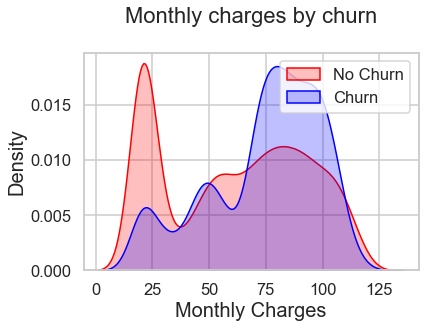

In [101]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

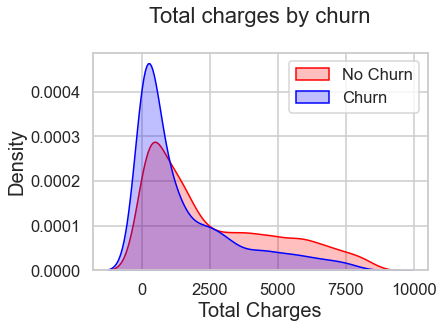

In [102]:
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

**9. ** Relationship between Monthly Charges and Total Charges

Total Charges increase as Monthly Charges increase - as expected.

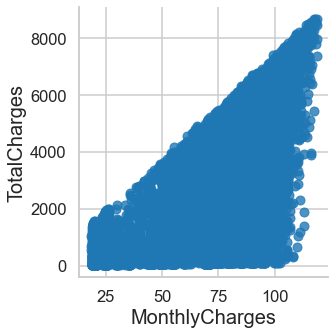

In [103]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

## Part 2: Feature Preprocessing

Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [104]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [105]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [106]:
y = df['Churn']

In [107]:
# Get feature space by dropping useless feature
to_drop = ['Churn', 'tenure']
X = df.drop(to_drop, axis=1)

In [108]:
X.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
tenure_group        category
dtype: object

In [109]:
cat_cols = X.columns[(X.dtypes == 'object') | (X.dtypes == 'category')]
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [165]:
num_cols

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [166]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'tenure_group'],
      dtype='object')

**Split dataset**  
Split before doing any processing to prevent data leakage which can lead to overfitting.  
Use stratified sampling to make sure the sample and test data will best represent the entire population.

In [112]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 5274 observation with 19 features
test data has 1758 observation with 19 features


In [113]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
1241,Male,0,No,No,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,64.50,1888.45,25 - 36
1301,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),58.20,3810.80,61 - 72
1604,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,61 - 72
934,Female,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,Yes,Mailed check,33.60,435.45,1 - 12
621,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,One year,Yes,Electronic check,92.05,5755.80,61 - 72


**One-hot-encoding** categorical variables

In [114]:
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

In [115]:
categories = cat_cols
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

OneHotEncoder()

In [116]:
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

C:\Users\liuwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\liuwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [117]:
X_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,64.50,1888.45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,58.20,3810.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,95.75,6511.25,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,33.60,435.45,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,92.05,5755.80,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Standadize data**  
1. Standardization isn't required for logistic regression. But regularization will be used thus standardiation is performed. 
2. Scaling is not necessary for random forests.
3. Standardization is necessary for KNN because distance based algorithms are affected by the scale of the variables

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [119]:
X_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,-0.439253,-0.008816,-0.172578,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.439253,-0.217370,0.674161,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.439253,1.025677,1.863630,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.439253,-1.031723,-0.812583,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.439253,0.903193,1.530876,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
y_train.head()

1241    0
1301    0
1604    0
934     0
621     0
Name: Churn, dtype: int32

## Part 3: Model Training and Evaluation

1.	Construct baseline model with Logistic Regression Classifier, K Nearest Neighbors, and Random Forest Classifier. Applied 5-fold Cross Validation, models evaluated on Accuracy, Precision, and Recall.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN


# Logistic Regression
classifier_logistic = LogisticRegression(max_iter=3000)

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [122]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    accuracy = model_selection.cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision = model_selection.cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
    recall = model_selection.cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
    print(model_names[count] + ':' + 'Accuracy: ' + str(accuracy.mean()) + ' Precision: ' + str(precision.mean()) + ' Recall: ' + str(recall.mean()))
    count += 1

Logistic Regression:Accuracy: 0.8041333848934773 Precision: 0.6697216279504566 Recall: 0.5199923741738688
KNN:Accuracy: 0.7665874079336672 Precision: 0.5650006844382218 Recall: 0.5314056939501779
Random Forest:Accuracy: 0.7906689928685127 Precision: 0.6351824544356202 Recall: 0.4857549567869852


2.	With highly imbalanced data, use SMOTEENN package to resample and transform the dataset into a more balanced dataset. 

In [123]:
from imblearn.combine import SMOTEENN

In [124]:
X_Rtrain, X_Rtest, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 5274 observation with 50 features
test data has 1758 observation with 50 features


In [125]:
X_Rtrain.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
1241,Male,0,No,No,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,64.50,1888.45,25 - 36
1301,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),58.20,3810.80,61 - 72
1604,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,61 - 72
934,Female,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,Yes,Mailed check,33.60,435.45,1 - 12
621,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,One year,Yes,Electronic check,92.05,5755.80,61 - 72


In [126]:
categories = cat_cols
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_Rtrain[categories])

OneHotEncoder()

In [127]:
X_Rtrain = OneHotEncoding(X_Rtrain, enc_ohe, categories)
X_Rtest = OneHotEncoding(X_Rtest, enc_ohe, categories)

C:\Users\liuwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\liuwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [163]:
X_Rtrain.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,-0.366954,-0.005350,0.065697,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.366954,-0.221242,1.002577,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.366954,1.065546,2.318672,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.366954,-0.377164,-0.194066,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.366954,-1.520024,-0.564656,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [164]:
X_Rtest.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,-0.366954,-1.554293,-0.845254,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.725134,1.262590,0.567290,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.725134,1.313993,1.663146,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.725134,1.041558,1.527904,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.366954,1.581289,2.381761,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
sm = SMOTEENN()
X_Rtrain, y_Rtrain = sm.fit_resample(X_Rtrain,y_train)

In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5274 non-null   float64
 1   MonthlyCharges                           5274 non-null   float64
 2   TotalCharges                             5274 non-null   float64
 3   gender_Female                            5274 non-null   float64
 4   gender_Male                              5274 non-null   float64
 5   Partner_No                               5274 non-null   float64
 6   Partner_Yes                              5274 non-null   float64
 7   Dependents_No                            5274 non-null   float64
 8   Dependents_Yes                           5274 non-null   float64
 9   PhoneService_No                          5274 non-null   float64
 10  PhoneService_Yes                         5274 no

In [170]:
y_train.value_counts()

0    3872
1    1402
Name: Churn, dtype: int64

In [169]:
y_Rtrain.value_counts()

1    2353
0    1995
Name: Churn, dtype: int64

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Rtrain[num_cols])
X_Rtrain[num_cols] = scaler.transform(X_Rtrain[num_cols])
X_Rtest[num_cols] = scaler.transform(X_Rtest[num_cols])

In [131]:
classifier_logistic.fit(X_Rtrain, y_Rtrain)

LogisticRegression(max_iter=3000)

In [132]:
yr_predict1 = classifier_logistic.predict(X_test)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yr_predict1))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1291
           1       0.47      0.80      0.59       467

    accuracy                           0.71      1758
   macro avg       0.69      0.74      0.68      1758
weighted avg       0.79      0.71      0.72      1758



## Part 4: Testing and Evaluation

### Use Grid Search to Find Optimal Hyperparameters  
Baseline model results showed Logistic Regression and Random Forest performed better, thus drop KNN. 

In [134]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Find Optimal Hyperparameters - LogisticRegression

In [135]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l1', 'l2'), ##real production does not really use L1 as it is not stable
    'C':(0.01, 0.05, 0.1, 0.2, 1)## c = 1 / lambda
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_Rtrain, y_Rtrain)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [136]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.924332632302951
Best parameters set:
C:1
penalty:l2


In [137]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [138]:
best_LR_prediction = best_LR_model.predict(X_Rtest)

In [139]:
print(classification_report(y_test, best_LR_prediction))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1291
           1       0.48      0.78      0.59       467

    accuracy                           0.72      1758
   macro avg       0.69      0.74      0.69      1758
weighted avg       0.79      0.72      0.73      1758



### ROC of LR Model

In [140]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [141]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_Rtest)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

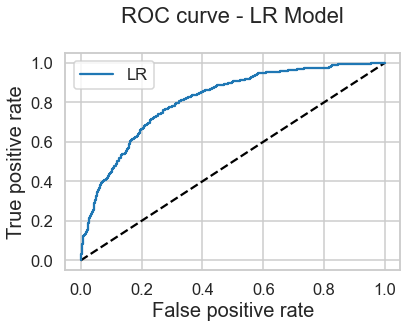

In [142]:
import matplotlib.pyplot as plt
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [143]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8108068210656214

### Find Optimal Hyperparameters: Random Forest

In [144]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees

#####Read sklearn RF package, how many hyperparamenter can you perfomr Grid Seaerch??
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_Rtrain, y_Rtrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [145]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.9579170138751107
Best parameters set:
max_depth:10
n_estimators:60


In [146]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [147]:
best_RF_model

RandomForestClassifier(max_depth=10, n_estimators=60)

In [148]:
best_RF_prediction = best_RF_model.predict(X_Rtest)

In [149]:
print(classification_report(y_test, best_RF_prediction))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1291
           1       0.53      0.73      0.61       467

    accuracy                           0.76      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.79      0.76      0.77      1758



### ROC of RF Model

In [150]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_rf = best_RF_model.predict_proba(X_Rtest)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

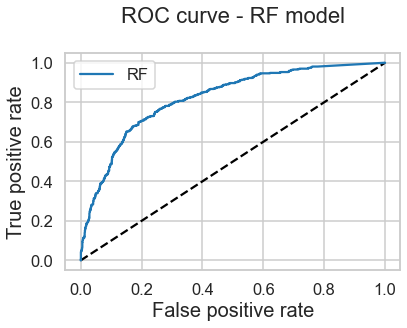

In [151]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [152]:
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8203897183100928

### Random Forest Model - Feature Importance Discussion


In [153]:
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_Rtest.shape[1]):
  print ("{0} : {1}".format(X_Rtest.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Contract_Month-to-month : 0.1745
TechSupport_No : 0.0861
OnlineSecurity_No : 0.0821
tenure_group_1 - 12 : 0.0746
TotalCharges : 0.0664
OnlineBackup_No : 0.056
PaymentMethod_Electronic check : 0.049
InternetService_Fiber optic : 0.0382
MonthlyCharges : 0.0324
tenure_group_61 - 72 : 0.0231
DeviceProtection_No : 0.0225
Contract_Two year : 0.0175
StreamingTV_No internet service : 0.0174
InternetService_No : 0.017
Partner_Yes : 0.0164
OnlineSecurity_Yes : 0.0157
TechSupport_Yes : 0.0154
InternetService_DSL : 0.0149
OnlineSecurity_No internet service : 0.0133
PaperlessBilling_Yes : 0.0115
PaperlessBilling_No : 0.009
PaymentMethod_Credit card (automatic) : 0.0085
Contract_One year : 0.0083
StreamingMovies_No internet service : 0.0083
tenure_group_49 - 60 : 0.0078
Partner_No : 0.0071
OnlineBackup_No internet service : 0.007
TechSupport_No internet service : 0.0068
OnlineBackup_Yes : 0.0064
DeviceProtection_No internet service : 0.0061
tenure_g

In [154]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.rc('axes', labelsize= 20) 
    plt.rc('ytick', labelsize=15)
    plt.figure(figsize=(15,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


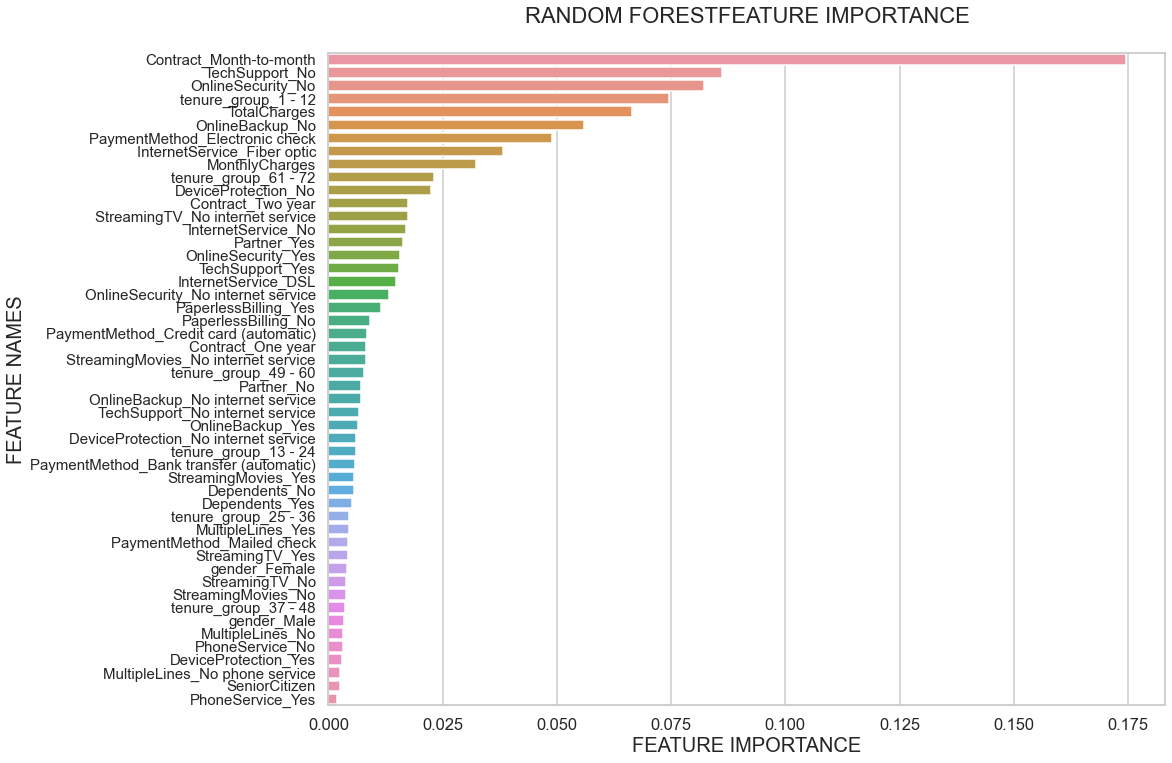

In [155]:
plot_feature_importance(best_RF_model.feature_importances_,X_Rtest.columns,'RANDOM FOREST')

## Part 5: Model Deployment & Inference

In [156]:
import pickle

In [157]:
filename = 'model.sav'

In [159]:
pickle.dump(best_RF_model, open(filename, 'wb'))

In [160]:
load_model = pickle.load(open(filename, 'rb'))

In [161]:
model_score_r1 = load_model.score(X_Rtest, y_test)

In [162]:
model_score_r1

0.7565415244596132